In [1]:
from astropy.cosmology import FlatLambdaCDM
from astropy.modeling.models import Linear1D, Exponential1D
from astropy.table import Table
from astropy.units import Quantity
from matplotlib import pyplot as plt
import numpy as np
from skypy.galaxies import schechter_lf
from skypy.pipeline import Pipeline

sky_area = Quantity(1.27, "deg2")
cosmology = FlatLambdaCDM(H0=70, Om0=0.3)

In [2]:
def lum_model(z_grid, M_bins, a_m, b_m, a_phi, b_phi, alpha):
    m_star = Linear1D(a_m, b_m)
    phi_star = Exponential1D(b_phi, 1/a_phi)
    L = 10 ** (0.4 * (m_star(z_grid) - M_bins[:, np.newaxis]))
    phi_model_z = 0.4 * np.log(10) * phi_star(z_grid) * L ** (alpha+1) * np.exp(-L)
    phi_model = np.median(phi_model_z, axis=1)
    
    return phi_model

def sim_hist(z_grid, redshift, cosmology, sky_area, magnitude, bins):
    z_mask = np.logical_and(redshift >= np.min(z_grid), redshift < np.max(z_grid))
    dV_dz = (cosmology.differential_comoving_volume(z_grid) * sky_area).to_value('Mpc3')
    dV = np.trapz(dV_dz, z_grid)
    dM = (np.max(bins)-np.min(bins)) / (np.size(bins)-1)
    phi = np.histogram(magnitude[z_mask], bins=bins)[0] / dV / dM
    return phi

def skypy_sim(z_range, mag_lim, sky_area, cosmology, a_m, b_m, a_phi, b_phi, alpha):
    m_star = Linear1D(a_m, b_m)
    phi_star = Exponential1D(b_phi, 1/a_phi)
    redshift, magnitude = schechter_lf(z_range, m_star, phi_star, alpha, mag_lim, 
                                       sky_area, cosmology, noise=True)
    return redshift, magnitude

In [3]:
#### Parameters
# Tortorelli 2021
a_m_SF_tortorelli = -0.439
b_m_SF_tortorelli = -20.623
a_phi_SF_tortorelli = -0.088
b_phi_SF_tortorelli = 0.004245
a_phi_frac_SF_tortorelli = -11.36364
alpha_SF_tortorelli = -1.3

a_m_Q_tortorelli = -0.697
b_m_Q_tortorelli = -20.372
a_phi_Q_tortorelli = -0.836
b_phi_Q_tortorelli = 0.005169
a_phi_frac_Q_tortorelli = -1.19617 
alpha_Q_tortorelli = -0.5

# Will
log_phi = 0.00412794712397292
phi_exp = -0.19843827
M_star = -21.72410256
M_exp = -0.14627561
alpha = -1.27094795
phi_exp_frac = -5.49 #-5.039350524472925

log_phi_passive_1 = 0.004879164659994692 # why is this called log_phi?
phi_exp_passive_1 = -1.63947599
M_star_passive_1 = -21.4189736
M_exp_passive_1 = -0.0748711
alpha_passive_1 = 0.44169467
phi_exp_frac_passive_1 = -5.32278 #-5.039350524472925

log_phi_passive_2 = 0.0002741907653287565
phi_exp_passive_2 = -1.93904484
M_star_passive_2 = -21.4189736
M_exp_passive_2 = -0.0748711
alpha_passive_2 = -1.55316951
phi_exp_frac_passive_2 = -8.2017 #-5.039350524472925

# Alhambra
a_m_SF_alhambra = -1.03
b_m_SF_alhambra = -20.485
a_phi_SF_alhambra = -0.0230259
b_phi_SF_alhambra = 0.00312608
a_phi_frac_SF_alhambra = -43.42936 
alpha_SF_alhambra = -1.29

a_m_Q_alhambra = -0.80
b_m_Q_alhambra = -20.46
a_phi_Q_alhambra = -0.94406
b_phi_Q_alhambra = 0.00278612
a_phi_frac_Q_alhambra = -1.05925 
alpha_Q_alhambra = -0.53

a_m_Q_2_alhambra = 0
b_m_Q_2_alhambra = -17
alpha_Q_2_alhambra = -1.31

In [4]:
#### Run Sims
z_range = np.linspace(0.01, 3, 100)
mag_lim = 30
cosmology = FlatLambdaCDM(H0=70, Om0=0.3)
sky_area = Quantity(1.27, "deg2")

# Tortorelli
redshift_tortorelli_sf, magnitude_tortorelli_sf = skypy_sim(z_range, mag_lim, sky_area, 
                                                            cosmology, a_m_SF_tortorelli, 
                                                            b_m_SF_tortorelli, a_phi_SF_tortorelli, 
                                                            b_phi_SF_tortorelli, alpha_SF_tortorelli)
redshift_tortorelli_Q, magnitude_tortorelli_Q = skypy_sim(z_range, mag_lim, sky_area, 
                                                            cosmology, a_m_Q_tortorelli, 
                                                            b_m_Q_tortorelli, a_phi_Q_tortorelli, 
                                                            b_phi_Q_tortorelli, alpha_Q_tortorelli)

# Will
redshift_will_sf, magnitude_will_sf = skypy_sim(z_range, mag_lim, sky_area, cosmology, M_exp, M_star, 
                                                phi_exp, log_phi, alpha)
redshift_will_Q_1, magnitude_will_Q_1 = skypy_sim(z_range, mag_lim, sky_area, cosmology, M_exp_passive_1, 
                                                  M_star_passive_1, phi_exp_passive_1, log_phi_passive_1, 
                                                  alpha_passive_1)
redshift_will_Q_2, magnitude_will_Q_2 = skypy_sim(z_range, mag_lim, sky_area, cosmology, M_exp_passive_2, 
                                                  M_star_passive_2, phi_exp_passive_2, log_phi_passive_2, 
                                                  alpha_passive_2)

# Alhambra
redshift_alhambra_sf, magnitude_alhambra_sf = skypy_sim(z_range, mag_lim, sky_area, 
                                                            cosmology, a_m_SF_alhambra, 
                                                            b_m_SF_alhambra, a_phi_SF_alhambra, 
                                                            b_phi_SF_alhambra, alpha_SF_alhambra)
redshift_alhambra_Q_1, magnitude_alhambra_Q_1 = skypy_sim(z_range, mag_lim, sky_area, 
                                                            cosmology, a_m_Q_alhambra, 
                                                            b_m_Q_alhambra, a_phi_Q_alhambra, 
                                                            b_phi_Q_alhambra, alpha_Q_alhambra)
redshift_alhambra_Q_2, magnitude_alhambra_Q_2 = skypy_sim(z_range, mag_lim, sky_area, 
                                                            cosmology, a_m_Q_2_alhambra, 
                                                            b_m_Q_2_alhambra, a_phi_Q_alhambra, 
                                                            b_phi_Q_alhambra, alpha_Q_2_alhambra)

In [5]:
pipeline = Pipeline.read("/Users/philipp/Documents/PhD/lum_func_measurement/COSMOS2020_tortorelli2021.yaml")
pipeline.execute()
sim_sf = pipeline['SF']
sim_q = pipeline['Q']
mask_sf = np.where((sim_sf['m_vista_true'][:,3]+sim_sf['m_vista_sim'][:,3]<24.5)&(sim_sf['z']>0))[0]
mask_q = np.where((sim_q['m_vista_true'][:,3]+sim_q['m_vista_sim'][:,3]<24.5)&(sim_q['z']>0))[0]
sim_sf = sim_sf[mask_sf]
sim_q = sim_q[mask_q]
print(len(sim_sf), len(sim_q), len(sim_sf)+len(sim_q))

505099 59989 565088


In [6]:
print(sim_sf['m_vista_true'][:,3]+sim_sf['m_vista_sim'][:,3])
print(sim_sf['m_vista_true'][:,3])
print(sim_sf['m_vista_sim'][:,3])

   m_vista_true   
------------------
22.808850174670212
19.232697242445536
24.374668038382683
23.478505615304254
24.111380681923468
 21.22249451095368
24.258251988799838
22.634993643242133
 20.79531829623769
23.327915383283806
               ...
22.723844183482562
23.119230570410938
24.223074689536958
 20.93578241356497
23.481993225460997
23.519330803347145
24.497983323363723
23.658190826628633
23.343408166555832
  23.2723325497326
15.403106999907719
Length = 505099 rows
   m_vista_true   
------------------
26.908126453532596
 27.81011648637064
24.512966053818282
27.242486888459446
23.986005510335875
 27.97651929470252
26.994434021422542
27.042848846484677
 20.79065079939378
 23.34556037781358
               ...
 22.71796716441625
23.111596760721312
24.171384134391516
 20.93943144446826
23.507266765433332
 27.13667037961764
 24.17326267602121
23.704954384222816
 26.61214447845719
23.366111923564418
 28.18483226856518
Length = 505099 rows
     m_vista_sim     
---------------------
  

In [7]:
bins = np.linspace(-27, -12, 35)
bins = np.arange(-27,-12+0.2,0.2)
z_slices = ((0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), (0.01, 1.0), 
            (1.0, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.0))

### Plots for star forming galaxies

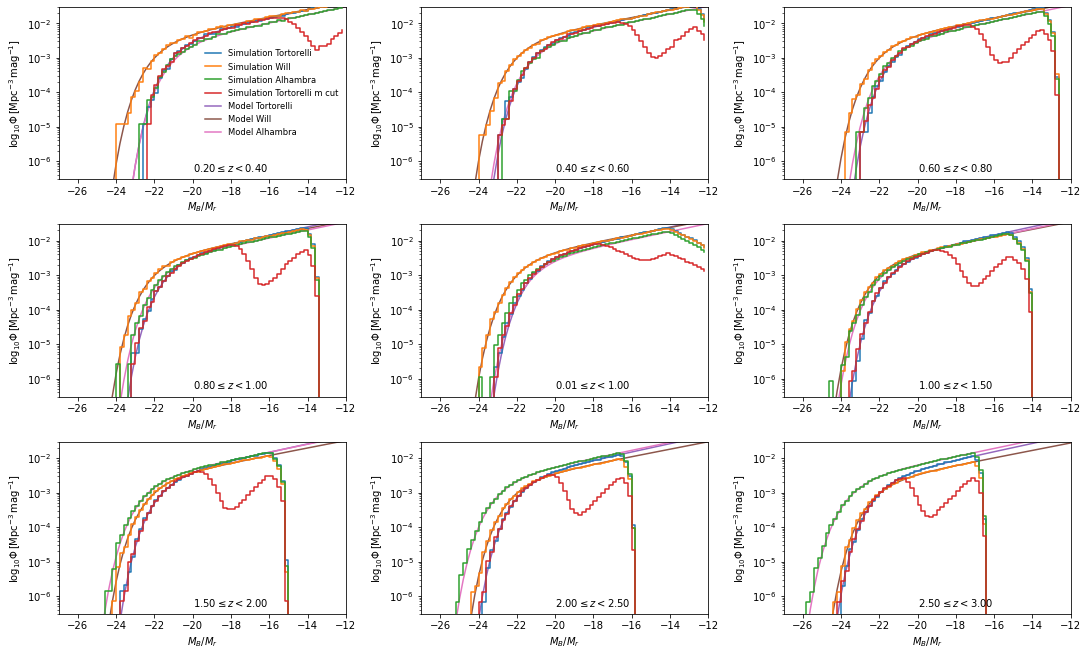

In [8]:
fig, ((a1, a2, a3), (a4, a5, a6), (a7, a8, a9)) = plt.subplots(nrows=3, ncols=3, constrained_layout=True, 
                                                               figsize=(15,9))

for ax, (z_min, z_max) in zip([a1, a2, a3, a4, a5, a6, a7, a8, a9], z_slices):

    # Redshift grid
    z_grid = np.linspace(z_min, z_max, 100)

    # SkyPy simulated galaxies
    sim_tortorelli = sim_hist(z_grid, redshift_tortorelli_sf, cosmology, sky_area, magnitude_tortorelli_sf, bins)
    
    sim_will = sim_hist(z_grid, redshift_will_sf, cosmology, sky_area, magnitude_will_sf, bins)
    
    sim_alhambra = sim_hist(z_grid, redshift_alhambra_sf, cosmology, sky_area, magnitude_alhambra_sf, bins)
    
    sim_cut = sim_hist(z_grid, sim_sf['z'], cosmology, sky_area, sim_sf['M_B'], bins)

    # Median-redshift Schechter function
    model_tortorelli = lum_model(z_grid, bins, a_m_SF_tortorelli, b_m_SF_tortorelli, 
                                 a_phi_SF_tortorelli, b_phi_SF_tortorelli, alpha_SF_tortorelli)
    
    model_will = lum_model(z_grid, bins, M_exp, M_star, phi_exp, log_phi, alpha)
    
    model_alhambra = lum_model(z_grid, bins, a_m_SF_alhambra, b_m_SF_alhambra, a_phi_SF_alhambra, 
                               b_phi_SF_alhambra, alpha_SF_alhambra)

    # Plotting
    ax.step(bins[:-1], sim_tortorelli, where='post', label='Simulation Tortorelli', zorder=3)
    ax.step(bins[:-1], sim_will, where='post', label='Simulation Will', zorder=3)
    ax.step(bins[:-1], sim_alhambra, where='post', label='Simulation Alhambra', zorder=3)
    ax.step(bins[:-1], sim_cut, where='post', label='Simulation Tortorelli m cut', zorder=3)
    
    ax.plot(bins, model_tortorelli, label='Model Tortorelli')
    ax.plot(bins, model_will, label='Model Will')
    ax.plot(bins, model_alhambra, label='Model Alhambra')
    
    ax.text(-20, 5e-7, r'${:.2f} \leq z < {:.2f}$'.format(z_min, z_max))
    ax.set_xlabel(r'$M_B/M_r$')
    ax.set_ylabel(r'$\log_{10} \Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
    ax.set_yscale('log')
    ax.set_xlim([-27, -12])
    ax.set_ylim([3e-7, 3e-2])

a1.legend(loc=5, fontsize='small', frameon=False)
plt.show()

### Plots for red galaxies

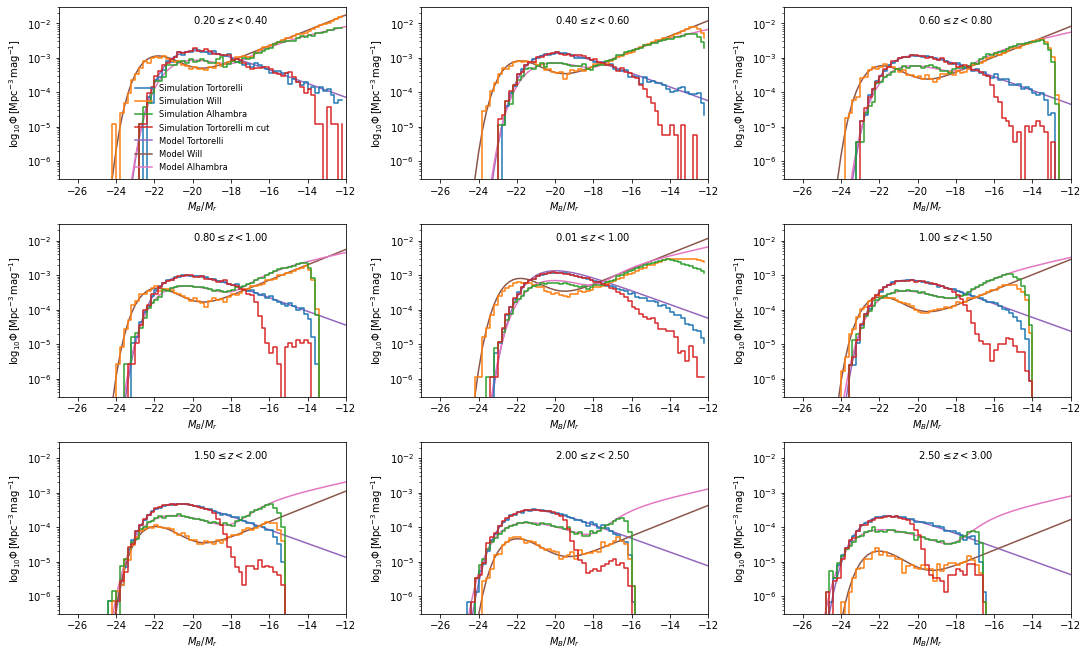

In [9]:
fig, ((a1, a2, a3), (a4, a5, a6), (a7, a8, a9)) = plt.subplots(nrows=3, ncols=3, constrained_layout=True, 
                                                               figsize=(15,9))

for ax, (z_min, z_max) in zip([a1, a2, a3, a4, a5, a6, a7, a8, a9], z_slices):

    # Redshift grid
    z_grid = np.linspace(z_min, z_max, 100)

    # SkyPy simulated galaxies
    sim_tortorelli = sim_hist(z_grid, redshift_tortorelli_Q, cosmology, sky_area, magnitude_tortorelli_Q, bins)
    
    sim_will = sim_hist(z_grid, redshift_will_Q_1, cosmology, sky_area, magnitude_will_Q_1, bins)
    sim_will_2 = sim_hist(z_grid, redshift_will_Q_2, cosmology, sky_area, magnitude_will_Q_2, bins)
    
    sim_alhambra = sim_hist(z_grid, redshift_alhambra_Q_1, cosmology, sky_area, magnitude_alhambra_Q_1, bins)
    sim_alhambra_2 = sim_hist(z_grid, redshift_alhambra_Q_2, cosmology, sky_area, magnitude_alhambra_Q_2, bins)
    
    sim_cut = sim_hist(z_grid, sim_q['z'], cosmology, sky_area, sim_q['M_B'], bins)

    # Median-redshift Schechter function
    model_tortorelli = lum_model(z_grid, bins, a_m_Q_tortorelli, b_m_Q_tortorelli, 
                                 a_phi_Q_tortorelli, b_phi_Q_tortorelli, alpha_Q_tortorelli)
    
    model_will = lum_model(z_grid, bins, M_exp_passive_1, M_star_passive_1, phi_exp_passive_1, 
                           log_phi_passive_1, alpha_passive_1)
    model_will_2 = lum_model(z_grid, bins, M_exp_passive_2, M_star_passive_2, phi_exp_passive_2, 
                           log_phi_passive_2, alpha_passive_2)
    
    model_alhambra = lum_model(z_grid, bins, a_m_Q_alhambra, b_m_Q_alhambra, a_phi_Q_alhambra, 
                               b_phi_Q_alhambra, alpha_Q_alhambra)
    model_alhambra_2 = lum_model(z_grid, bins, a_m_Q_2_alhambra, b_m_Q_2_alhambra, a_phi_Q_alhambra, 
                               b_phi_Q_alhambra, alpha_Q_2_alhambra)

    # Plotting
    ax.step(bins[:-1], sim_tortorelli, where='post', label='Simulation Tortorelli', zorder=3)
    ax.step(bins[:-1], sim_will+sim_will_2, where='post', label='Simulation Will', zorder=3)
    ax.step(bins[:-1], sim_alhambra+sim_alhambra_2, where='post', label='Simulation Alhambra', zorder=3)
    ax.step(bins[:-1], sim_cut, where='post', label='Simulation Tortorelli m cut', zorder=3)
    
    ax.plot(bins, model_tortorelli, label='Model Tortorelli')
    ax.plot(bins, model_will+model_will_2, label='Model Will')
    ax.plot(bins, model_alhambra+model_alhambra_2, label='Model Alhambra')
    
    ax.text(-20, 1e-2, r'${:.2f} \leq z < {:.2f}$'.format(z_min, z_max))
    ax.set_xlabel(r'$M_B/M_r$')
    ax.set_ylabel(r'$\log_{10} \Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
    ax.set_yscale('log')
    ax.set_xlim([-27, -12])
    ax.set_ylim([3e-7, 3e-2])

a1.legend(loc=8, fontsize='small', frameon=False)
plt.show()

### Plots for all galaxies

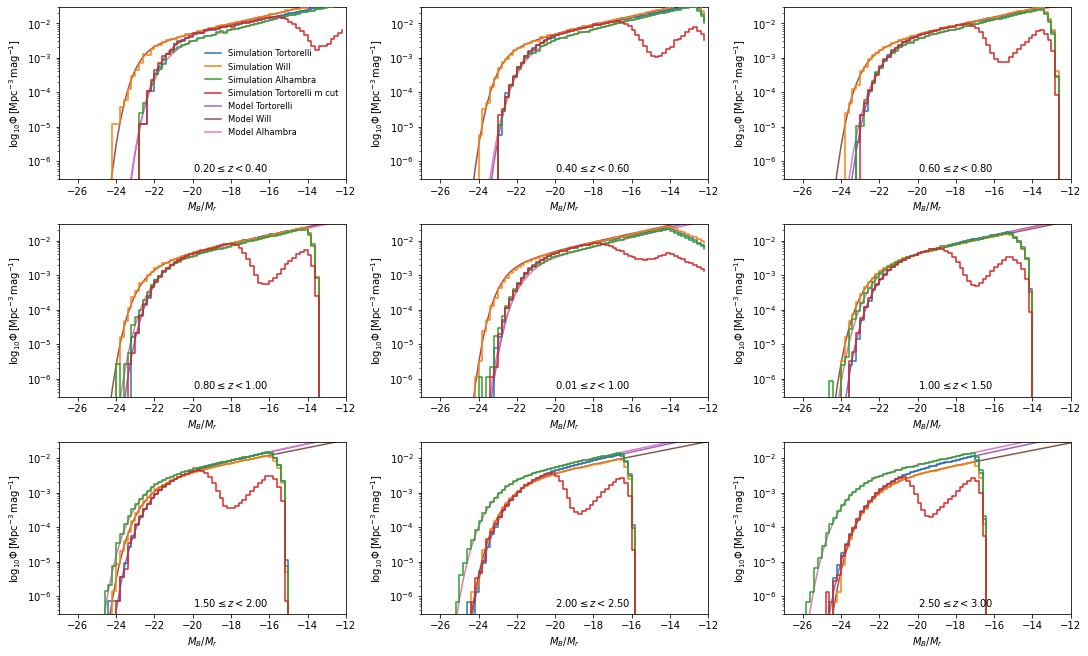

In [10]:
fig, ((a1, a2, a3), (a4, a5, a6), (a7, a8, a9)) = plt.subplots(nrows=3, ncols=3, constrained_layout=True, 
                                                               figsize=(15,9))

for ax, (z_min, z_max) in zip([a1, a2, a3, a4, a5, a6, a7, a8, a9], z_slices):

    # Redshift grid
    z_grid = np.linspace(z_min, z_max, 100)

    # SkyPy simulated galaxies
    sim_tortorelli_sf = sim_hist(z_grid, redshift_tortorelli_sf, cosmology, sky_area, magnitude_tortorelli_sf, bins)
    sim_tortorelli_q = sim_hist(z_grid, redshift_tortorelli_Q, cosmology, sky_area, magnitude_tortorelli_Q, bins)

    sim_will_sf = sim_hist(z_grid, redshift_will_sf, cosmology, sky_area, magnitude_will_sf, bins)
    sim_will_q = sim_hist(z_grid, redshift_will_Q_1, cosmology, sky_area, magnitude_will_Q_1, bins)
    sim_will_q_2 = sim_hist(z_grid, redshift_will_Q_2, cosmology, sky_area, magnitude_will_Q_2, bins)
    
    sim_alhambra_sf = sim_hist(z_grid, redshift_alhambra_sf, cosmology, sky_area, magnitude_alhambra_sf, bins)
    sim_alhambra_q = sim_hist(z_grid, redshift_alhambra_Q_1, cosmology, sky_area, magnitude_alhambra_Q_1, bins)
    sim_alhambra_q_2 = sim_hist(z_grid, redshift_alhambra_Q_2, cosmology, sky_area, magnitude_alhambra_Q_2, bins)
    
    sim_cut_sf = sim_hist(z_grid, sim_sf['z'], cosmology, sky_area, sim_sf['M_B'], bins)
    sim_cut_q = sim_hist(z_grid, sim_q['z'], cosmology, sky_area, sim_q['M_B'], bins)

    # Median-redshift Schechter function
    model_tortorelli_sf = lum_model(z_grid, bins, a_m_SF_tortorelli, b_m_SF_tortorelli, 
                                 a_phi_SF_tortorelli, b_phi_SF_tortorelli, alpha_SF_tortorelli)
    model_tortorelli_q = lum_model(z_grid, bins, a_m_Q_tortorelli, b_m_Q_tortorelli, 
                                 a_phi_Q_tortorelli, b_phi_Q_tortorelli, alpha_Q_tortorelli)
    
    model_will_sf = lum_model(z_grid, bins, M_exp, M_star, phi_exp, log_phi, alpha)
    model_will_q = lum_model(z_grid, bins, M_exp_passive_1, M_star_passive_1, phi_exp_passive_1, 
                           log_phi_passive_1, alpha_passive_1)
    model_will_q_2 = lum_model(z_grid, bins, M_exp_passive_2, M_star_passive_2, phi_exp_passive_2, 
                           log_phi_passive_2, alpha_passive_2)
    
    model_alhambra_sf = lum_model(z_grid, bins, a_m_SF_alhambra, b_m_SF_alhambra, a_phi_SF_alhambra, 
                               b_phi_SF_alhambra, alpha_SF_alhambra)
    model_alhambra_q = lum_model(z_grid, bins, a_m_Q_alhambra, b_m_Q_alhambra, a_phi_Q_alhambra, 
                               b_phi_Q_alhambra, alpha_Q_alhambra)
    model_alhambra_q_2 = lum_model(z_grid, bins, a_m_Q_2_alhambra, b_m_Q_2_alhambra, a_phi_Q_alhambra, 
                               b_phi_Q_alhambra, alpha_Q_2_alhambra)

    # Plotting
    ax.step(bins[:-1], sim_tortorelli_sf+sim_tortorelli_q, where='post', label='Simulation Tortorelli', zorder=3)
    ax.step(bins[:-1], sim_will_sf+sim_will_q+sim_will_q_2, where='post', label='Simulation Will', zorder=3)
    ax.step(bins[:-1], sim_alhambra_sf+sim_alhambra_q+sim_alhambra_q_2, where='post', 
            label='Simulation Alhambra', zorder=3)
    ax.step(bins[:-1], sim_cut_sf+sim_cut_q, where='post', label='Simulation Tortorelli m cut', zorder=3)
    
    ax.plot(bins, model_tortorelli_sf+model_tortorelli_q, label='Model Tortorelli')
    ax.plot(bins, model_will_sf+model_will_q+model_will_q_2, label='Model Will')
    ax.plot(bins, model_alhambra_sf+model_alhambra_q+model_alhambra_q_2, label='Model Alhambra')
    
    ax.text(-20, 5e-7, r'${:.2f} \leq z < {:.2f}$'.format(z_min, z_max))
    ax.set_xlabel(r'$M_B/M_r$')
    ax.set_ylabel(r'$\log_{10} \Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
    ax.set_yscale('log')
    ax.set_xlim([-27, -12])
    ax.set_ylim([3e-7, 3e-2])

a1.legend(loc=5, fontsize='small', frameon=False)
plt.show()

### Investigate different m_lim

In [11]:
mag_lim = [27,30,32,35,40]
sims = {}
for m_lim in mag_lim:
    redshift_tortorelli_sf, magnitude_tortorelli_sf = skypy_sim(z_range, m_lim, sky_area, 
                                                            cosmology, a_m_SF_tortorelli, 
                                                            b_m_SF_tortorelli, a_phi_SF_tortorelli, 
                                                            b_phi_SF_tortorelli, alpha_SF_tortorelli)
    redshift_tortorelli_Q, magnitude_tortorelli_Q = skypy_sim(z_range, m_lim, sky_area, 
                                                            cosmology, a_m_Q_tortorelli, 
                                                            b_m_Q_tortorelli, a_phi_Q_tortorelli, 
                                                            b_phi_Q_tortorelli, alpha_Q_tortorelli)
    sims[str(m_lim)] = [np.concatenate((redshift_tortorelli_sf, redshift_tortorelli_Q)), 
                     np.concatenate((magnitude_tortorelli_sf, magnitude_tortorelli_Q))]
    print(len(sims[str(m_lim)][0]))

529149
1754385
3376932
8299540
34378203


In [12]:
print(sims['27'][1])

[-21.88779352 -18.81771117 -18.3192847  ... -17.9314185  -18.03258779
 -18.63905505]


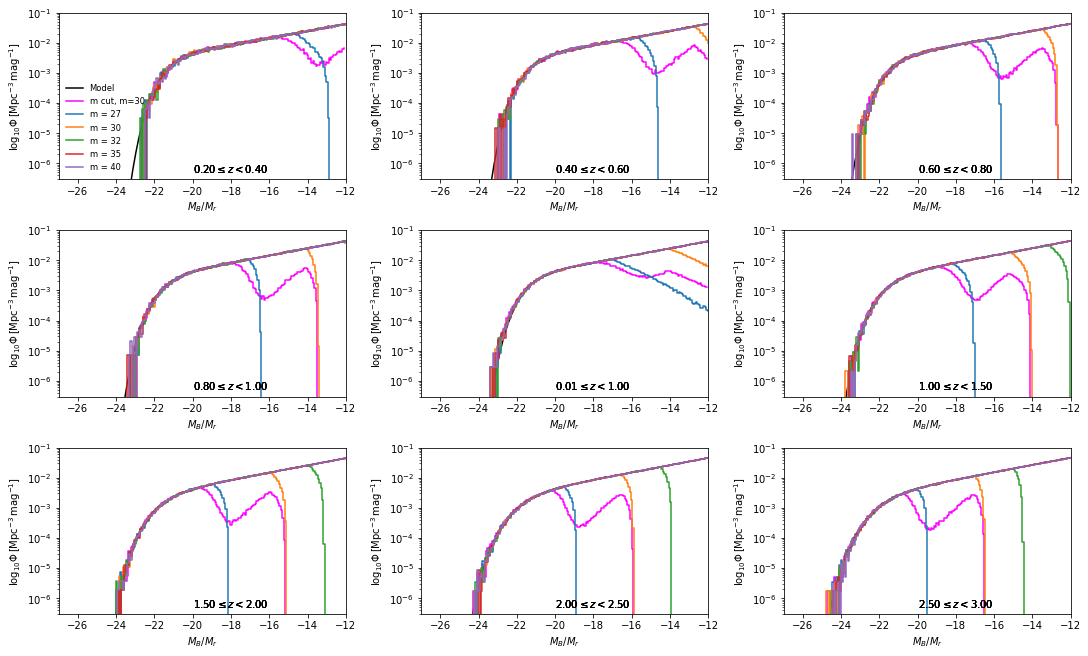

In [13]:
bins = np.linspace(-27, -12, 200)
bin_centers = (bins[:-1] + bins[1:])/2
fig, ((a1, a2, a3), (a4, a5, a6), (a7, a8, a9)) = plt.subplots(nrows=3, ncols=3, constrained_layout=True, 
                                                               figsize=(15,9))
z_slices = ((0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), (0.01, 1.0), 
            (1.0, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.0))
for ax, (z_min, z_max) in zip([a1, a2, a3, a4, a5, a6, a7, a8, a9], z_slices):

    # Redshift grid
    z_grid = np.linspace(z_min, z_max, 100)
    model_tortorelli_sf = lum_model(z_grid, bin_centers, a_m_SF_tortorelli, b_m_SF_tortorelli, 
                                 a_phi_SF_tortorelli, b_phi_SF_tortorelli, alpha_SF_tortorelli)
    model_tortorelli_q = lum_model(z_grid, bin_centers, a_m_Q_tortorelli, b_m_Q_tortorelli, 
                                 a_phi_Q_tortorelli, b_phi_Q_tortorelli, alpha_Q_tortorelli)
    
    sim_cut_sf = sim_hist(z_grid, sim_sf['z'], cosmology, sky_area, sim_sf['M_B'], bins)
    sim_cut_q = sim_hist(z_grid, sim_q['z'], cosmology, sky_area, sim_q['M_B'], bins)
    
    ax.plot(bin_centers, model_tortorelli_sf+model_tortorelli_q, label='Model', color='black')
    ax.step(bins[:-1], sim_cut_sf+sim_cut_q, where='post', label='m cut, m=30', zorder=3, color="magenta")
    
    for m_lim in mag_lim:
        # SkyPy simulated galaxies
        sim_tortorelli = sim_hist(z_grid, sims[str(m_lim)][0], cosmology, sky_area, sims[str(m_lim)][1], bins)

        # Plotting
        ax.step(bin_centers, sim_tortorelli, where='post', label=f'm = {m_lim}', zorder=3)

        ax.text(-20, 5e-7, r'${:.2f} \leq z < {:.2f}$'.format(z_min, z_max))
        ax.set_xlabel(r'$M_B/M_r$')
        ax.set_ylabel(r'$\log_{10} \Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
        ax.set_yscale('log')
        ax.set_xlim([-27, -12])
        ax.set_ylim([3e-7, 1e-1])

a1.legend(loc=3, fontsize='small', frameon=False)
plt.show()

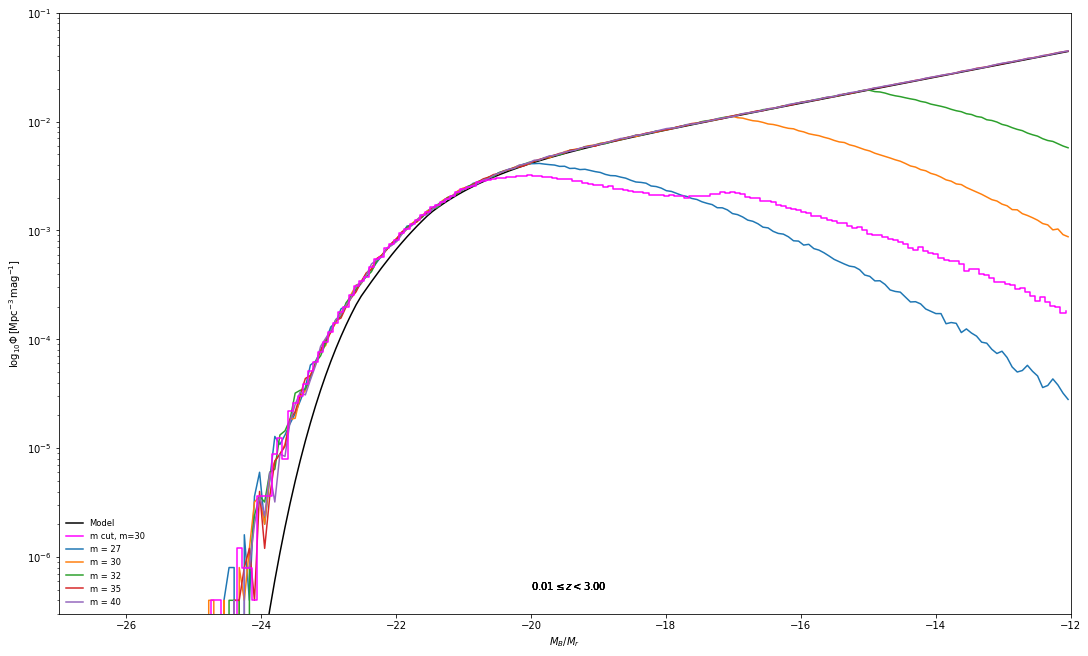

In [14]:
z_min, z_max = 0.01, 3
fig, a1 = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(15,9))


# Redshift grid
z_grid = np.linspace(z_min, z_max, 100)

z_grid = np.linspace(z_min, z_max, 100)
model_tortorelli_sf = lum_model(z_grid, bin_centers, a_m_SF_tortorelli, b_m_SF_tortorelli, 
                             a_phi_SF_tortorelli, b_phi_SF_tortorelli, alpha_SF_tortorelli)
model_tortorelli_q = lum_model(z_grid, bin_centers, a_m_Q_tortorelli, b_m_Q_tortorelli, 
                             a_phi_Q_tortorelli, b_phi_Q_tortorelli, alpha_Q_tortorelli)

sim_cut_sf = sim_hist(z_grid, sim_sf['z'], cosmology, sky_area, sim_sf['M_B'], bins)
sim_cut_q = sim_hist(z_grid, sim_q['z'], cosmology, sky_area, sim_q['M_B'], bins)

a1.plot(bin_centers, model_tortorelli_sf+model_tortorelli_q, label='Model', color='black')
a1.step(bins[:-1], sim_cut_sf+sim_cut_q, where='post', label='m cut, m=30', zorder=3, color="magenta")

for m_lim in mag_lim:
    # SkyPy simulated galaxies
    sim_tortorelli = sim_hist(z_grid, sims[str(m_lim)][0], cosmology, sky_area, sims[str(m_lim)][1], bins)

    # Plotting
    a1.plot(bin_centers, sim_tortorelli, label=f'm = {m_lim}')

    a1.text(-20, 5e-7, r'${:.2f} \leq z < {:.2f}$'.format(z_min, z_max))
    a1.set_xlabel(r'$M_B/M_r$')
    a1.set_ylabel(r'$\log_{10} \Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
    a1.set_yscale('log')
    a1.set_xlim([-27, -12])
    a1.set_ylim([3e-7, 1e-1])

a1.legend(loc=3, fontsize='small', frameon=False)
plt.show()

### Look at apparent magnitude distributions

In [15]:
pipeline = Pipeline.read("/Users/philipp/Documents/PhD/lum_func_measurement/COSMOS2020_tortorelli2021.yaml")
pipeline.execute()
sim_sf = pipeline['SF']
sim_q = pipeline['Q']

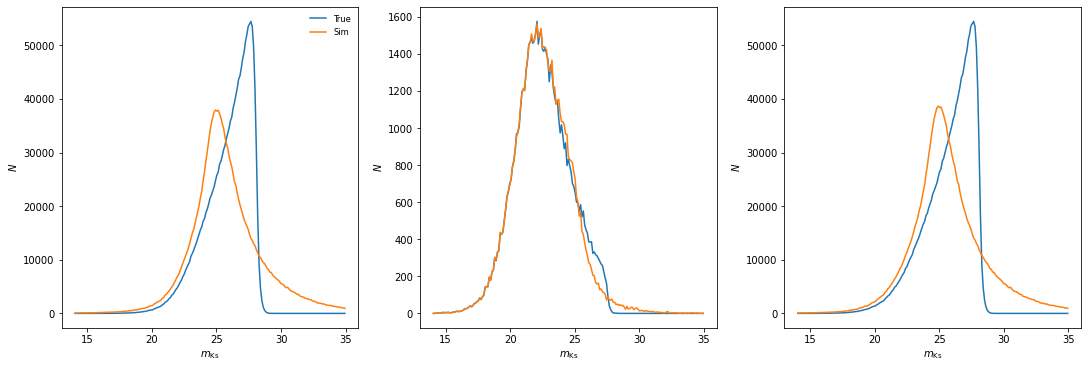

In [16]:
fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True,figsize=(15,5))
pops = ['SF', 'Q', 'Total']

bins = np.linspace(14, 35, 200)
bin_centers = (bins[:-1] + bins[1:])/2
    
for ax, pop in zip([a1, a2, a3], pops):
    if pop == 'Total':
        hist_true, _ = np.histogram(np.concatenate((sim_sf['m_vista_true'][:,3],sim_q['m_vista_true'][:,3])), 
                                    bins=bins)
        hist_sim, _ = np.histogram(np.concatenate((sim_sf['m_vista_true'][:,3]+sim_sf['m_vista_sim'][:,3],
                                                   sim_q['m_vista_true'][:,3]+sim_q['m_vista_sim'][:,3])), 
                                   bins=bins)
    else:
        hist_true, _ = np.histogram(pipeline[pop]['m_vista_true'][:,3], bins=bins)
        hist_sim, _ = np.histogram(pipeline[pop]['m_vista_true'][:,3]+pipeline[pop]['m_vista_sim'][:,3], bins=bins)

    ax.plot(bin_centers, hist_true, label='True')
    ax.plot(bin_centers, hist_sim, label='Sim')
    ax.set_xlabel(r'$m_\mathrm{Ks}$')
    ax.set_ylabel(r'$N$')
    #ax.set_yscale('log')
a1.legend(loc=1, fontsize='small', frameon=False)
plt.show()

In [17]:
print(sim_sf['m_vista_true'][:,3]+sim_sf['m_vista_sim'][:,3])
print(sim_sf['m_vista_true'][:,3])
print(sim_sf['m_vista_sim'][:,3])

   m_vista_true   
------------------
 26.55094481418704
26.767191534065446
25.734666986504994
 26.42055217556811
25.600913950633377
 25.27921943638271
 31.77176720505821
23.243494779230435
28.651470494670136
 18.02347591026564
               ...
23.483471503639784
25.966103427865068
25.043386078491025
25.260201995362895
21.433304765710066
 29.21663247815338
 25.63528163866449
26.491871836123753
24.855091159581054
24.592857772073994
  35.4806359549832
Length = 1683358 rows
   m_vista_true   
------------------
25.966459822077244
27.241412104920947
25.619779323403296
25.611198141971805
27.743894242182204
 25.39361744106262
28.086970972040717
23.233896242364075
27.250898531053735
 27.61593804281087
               ...
 28.40192036291154
25.896274401158493
27.132075421827395
25.001807639822644
27.730773944559076
26.883624032321613
 26.83046203768388
 25.58525403905466
27.222634633537165
25.068063125735172
27.641752229996655
Length = 1683358 rows
    m_vista_sim     
--------------------
  

In [18]:
mask_sf = ((sim_sf['m_vista_true'][:,3]+sim_sf['m_vista_sim'][:,3])<24.5)&(sim_sf['z']>0)
mask_q = ((sim_q['m_vista_true'][:,3]+sim_q['m_vista_sim'][:,3])<24.5)&(sim_q['z']>0)
sim_sf = sim_sf[mask_sf]
sim_q = sim_q[mask_q]

In [19]:
print(mask_sf)
print(len(mask_sf[mask_sf==False]), len(sim_sf['m_vista_true'][:,3]))

print(mask_q[mask_q==False])

[False False False ... False False False]
1178910 504448
[False False False ... False False False]


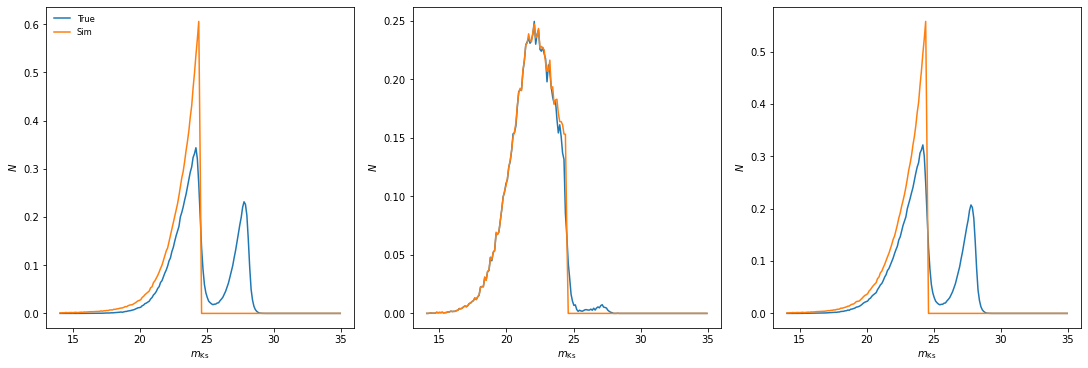

In [20]:
fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True,figsize=(15,5))
pops = ['SF', 'Q', 'Total']

bins = np.linspace(14, 35, 200)
bin_centers = (bins[:-1] + bins[1:])/2
    
for ax, pop in zip([a1, a2, a3], pops):
    if pop == 'Total':
        hist_true, _ = np.histogram(np.concatenate((sim_sf['m_vista_true'][:,3],sim_q['m_vista_true'][:,3])), 
                                    bins=bins, density=True)
        hist_sim, _ = np.histogram(np.concatenate((sim_sf['m_vista_true'][:,3]+sim_sf['m_vista_sim'][:,3],
                                                   sim_q['m_vista_true'][:,3]+sim_q['m_vista_sim'][:,3])), 
                                   bins=bins, density=True)
    elif pop == 'SF':
        hist_true, _ = np.histogram(sim_sf['m_vista_true'][:,3], bins=bins, density=True)
        sf = sim_sf['m_vista_true'][:,3]+sim_sf['m_vista_sim'][:,3]
        hist_sim, _ = np.histogram(sf, bins=bins, density=True)
    elif pop == 'Q':
        hist_true, _ = np.histogram(sim_q['m_vista_true'][:,3], bins=bins, density=True)
        q = sim_q['m_vista_true'][:,3]+sim_q['m_vista_sim'][:,3]
        hist_sim, _ = np.histogram(q, bins=bins, density=True)

    ax.plot(bin_centers, hist_true, label='True')
    ax.plot(bin_centers, hist_sim, label='Sim')
    ax.set_xlabel(r'$m_\mathrm{Ks}$')
    ax.set_ylabel(r'$N$')
    #ax.set_yscale('log')
a1.legend(loc=2, fontsize='small', frameon=False)
plt.show()